In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import glob
import cv2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
# from tensorflow.keras.layers.normalization import BatchNormalization
import os
import seaborn as sns
from keras.applications import EfficientNetB0
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from sklearn import preprocessing

In [2]:
SIZE=224

In [3]:
train_images, train_labels = [], []
for directory_path in glob.glob("Training/*"):
    tr_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        train_images.append(img)
        train_labels.append(tr_label)

In [4]:
test_images, test_labels = [], []
for directory_path in glob.glob("Testing/*"):
    ts_label = directory_path.split("\\")[-1]
    for img_path in glob.glob(os.path.join(directory_path, "*.png")):
        img = cv2.imread(img_path, cv2.IMREAD_COLOR)
        test_images.append(img)
        test_labels.append(ts_label)

In [5]:
# Convert images and labels to numpy arrays
x_train = np.array(train_images)
y_train = np.array(train_labels)
x_test = np.array(test_images)
y_test = np.array(test_labels)

In [6]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((8406, 224, 224, 3), (8406,), (2104, 224, 224, 3), (2104,))

In [7]:
# Encode labels from text to integers
label_encoder = preprocessing.LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# One-hot encode y values for the neural network
from keras.utils import to_categorical
y_train_one_hot = to_categorical(y_train_encoded, num_classes=5)
y_test_one_hot = to_categorical(y_test_encoded, num_classes=5)

In [8]:
x_train.shape, y_train_one_hot.shape, x_test.shape, y_test_one_hot.shape

((8406, 224, 224, 3), (8406, 5), (2104, 224, 224, 3), (2104, 5))

In [9]:
base_model = EfficientNetB0(input_shape=(224, 224,3), include_top=False, weights="imagenet")

In [10]:
from tensorflow.keras import layers 
import tensorflow as tf
for layer in base_model.layers:
    layer.trainable = False

In [11]:
base_model.trainable=False
classifier=Sequential()
classifier.add(base_model)
classifier.add(Flatten())
classifier.add(Dense(5,activation='softmax'))

In [12]:
classifier.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
history = classifier.fit(x_train, y_train_one_hot, epochs=50, batch_size=32)

Epoch 1/50
263/263 [==============================] - 237s 892ms/step - loss: 0.4412 - accuracy: 0.9212
Epoch 2/50
263/263 [==============================] - 235s 895ms/step - loss: 0.1085 - accuracy: 0.9759
Epoch 3/50
263/263 [==============================] - 234s 888ms/step - loss: 0.1143 - accuracy: 0.9783
Epoch 4/50
263/263 [==============================] - 233s 888ms/step - loss: 0.1309 - accuracy: 0.9767
Epoch 5/50
263/263 [==============================] - 251s 953ms/step - loss: 0.1314 - accuracy: 0.9814
Epoch 6/50
263/263 [==============================] - 242s 920ms/step - loss: 0.0618 - accuracy: 0.9892
Epoch 7/50
263/263 [==============================] - 238s 903ms/step - loss: 0.0585 - accuracy: 0.9908
Epoch 8/50
263/263 [==============================] - 233s 884ms/step - loss: 0.0875 - accuracy: 0.9877
Epoch 9/50
263/263 [==============================] - 233s 884ms/step - loss: 0.0478 - accuracy: 0.9925
Epoch 10/50
263/263 [==============================] - 233s 885m

In [16]:
prediction_NN = classifier.predict(x_test)
prediction_NN = np.argmax(prediction_NN, axis=-1)
prediction_NN = label_encoder.inverse_transform(prediction_NN)

66/66 [==============================] - 60s 909ms/step


In [17]:
#Confusion Matrix - verify accuracy of each class
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_labels, prediction_NN)
print(cm)

[[1189    0    0    0    0]
 [   0  153    0    3    0]
 [   0    0  156    0    0]
 [   0    0    0  127    0]
 [   0    0    0    1  475]]


In [18]:
from sklearn import metrics
print ("Accuracy = ", metrics.accuracy_score(test_labels, prediction_NN))

Accuracy =  0.9980988593155894


In [19]:
# Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# print(class_labels)
target_names = ['Class 0', 'Class 1', 'Class 2', 'Class 3', 'Class 4']
# print(confusion_matrix(test_labels, prediction_NN))
print(classification_report(test_labels, prediction_NN, target_names=target_names,digits=3))

              precision    recall  f1-score   support

     Class 0      1.000     1.000     1.000      1189
     Class 1      1.000     0.981     0.990       156
     Class 2      1.000     1.000     1.000       156
     Class 3      0.969     1.000     0.984       127
     Class 4      1.000     0.998     0.999       476

    accuracy                          0.998      2104
   macro avg      0.994     0.996     0.995      2104
weighted avg      0.998     0.998     0.998      2104



In [20]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix

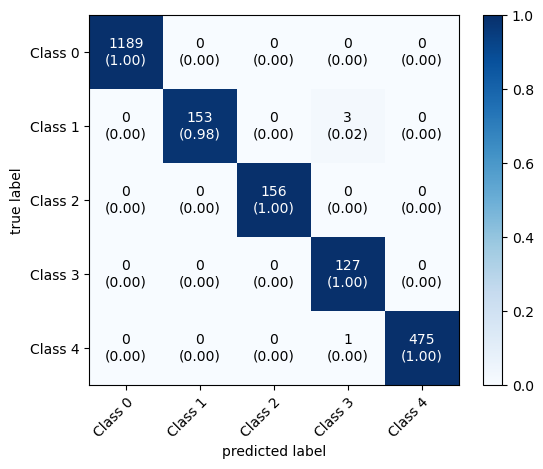

In [21]:
class_dict = {0: 'Class 0',
              1: 'Class 1',
              2: 'Class 2',
              3: 'Class 3',
              4: 'Class 4'}

multiclass = np.array([[1189,    0,    0,    0,    0],
                       [0,  153,    0,    3,    0],
                       [0,    0,  156,    0,    0],
                       [0,    0,    0,  127,    0],
                       [0,    0,    0,    1,  475]])

fig, ax = plot_confusion_matrix(
    conf_mat=multiclass,
    class_names=class_dict.values(),show_normed=True,colorbar=True)